Используя в качестве исходного набора данных датасет из примера, постройте модель для определения, является ли трафик подозрительным. Предикторами являются все колонки, кроме последней колонки class, которая является откликом.

Разделите датасет на тренировочный и тестовый наборы данных с параметрами test_size = 0.2, random_state = 89. Используйте стратифицированное разделение по столбцу class: stratify = df.iloc[:,-1]. Стандартизируйте признаки тренировочных данных при помощи StandardScaler. Примените полученное преобразование для тестовых данных. Обучите классификатор MLPClassifier при random_state = 89, hidden_layer_sizes = (20, 10), activation = 'logistic', max_iter = 1000 на обучающей выборке и произведите оценку полученной модели на тестовой.



In [5]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


In [3]:
#чтение данных
df = pd.read_csv("/Users/ekaterina/github_repos/ITMO_STUDY/ datasets/ DL_datasets/360T.csv", delimiter=',')
df.head()

,num_frames,num_frames_avg,num_packets,num_packets_avg,num_packets_out_avg,num_packets_out_max,num_packets_out_min,num_packets_in_avg,num_packets_in_max,num_packets_in_min,...,num_forwarded_packets_avg,num_forwarded_packets_max,num_forwarded_packets_min,num_packets_created_avg,num_packets_created_max,num_packets_created_min,frac_packets_created_acquired_avg,frac_packets_created_acquired_max,frac_packets_created_acquired_min,class
0,38007,2533,31348,2089,218,1777,46,266,2266,38,...,583,1328,108,69,136,46,1.02,2,1,0
1,32695,2179,26253,1750,212,1726,48,212,1814,34,...,575,1344,105,32,83,48,1.00,1,1,0
2,32655,2177,26396,1759,212,1654,41,212,1701,30,...,578,1270,120,21,76,41,1.00,1,1,0
3,33541,2236,26612,1774,213,1695,50,214,1741,38,...,586,1316,112,1,82,50,1.00,1,1,0
4,32925,2195,26472,1764,213,1750,44,213,1805,35,...,586,1375,115,1,83,44,1.00,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   num_frames                         2336 non-null   int64  
 1   num_frames_avg                     2336 non-null   int64  
 2   num_packets                        2336 non-null   int64  
 3   num_packets_avg                    2336 non-null   int64  
 4   num_packets_out_avg                2336 non-null   int64  
 5   num_packets_out_max                2336 non-null   int64  
 6   num_packets_out_min                2336 non-null   int64  
 7   num_packets_in_avg                 2336 non-null   int64  
 8   num_packets_in_max                 2336 non-null   int64  
 9   num_packets_in_min                 2336 non-null   int64  
 10  weighted_num_packets_in_avg        2336 non-null   float64
 11  weighted_num_packets_in_max        2336 non-null   float

(array([  85.,    0.,    0.,    0.,    0., 2251.]),
 array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        ]),
 <BarContainer object of 6 artists>)

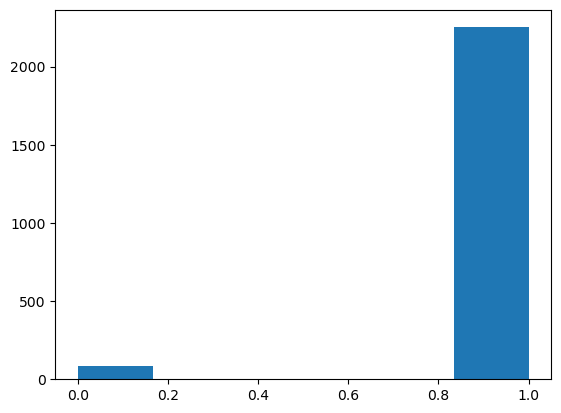

In [7]:
plt.hist(df['class'], bins=6)


In [8]:
# Распределение по классам неравномерное, в связи с этим надо использовать метод stratified при разделении выборки на тренировочную и тестовую
# стратификация означает, что метод train_test_split возвращает обучающие и тестовые подмножества, которые имеют те же пропорции меток классов, 
# что и входной набор данных.

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], 
                                                    test_size=0.2, random_state=89, stratify = df.iloc[:,-1])

In [10]:
X_train.shape

(1868, 51)

In [11]:
X_test.shape

(468, 51)

In [12]:
y_train.shape

(1868,)

In [13]:
y_test.shape

(468,)

In [14]:
# Стандартизируйте признаки тренировочных данных при помощи StandardScaler

sc = StandardScaler()
# Обучаем скейлер на X_train и применяем преобразование
X_train_scaled = sc.fit_transform(X_train)

# Преобразовываем X_test
X_test_scaled = sc.transform(X_test)


###  Строим классификатор

In [15]:
mlp = MLPClassifier(random_state=89, 
                    hidden_layer_sizes=(20,10), # Используем два скрытых слоя и укажем число нейронов в каждом
                    activation='logistic', # Определим функцию активации
                    max_iter=1000, # Максимальное число эпох обучения
                   )
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 10), max_iter=1000,
              random_state=89)

Смотрим тренд Lossfunction во время прохождения эпох обучения

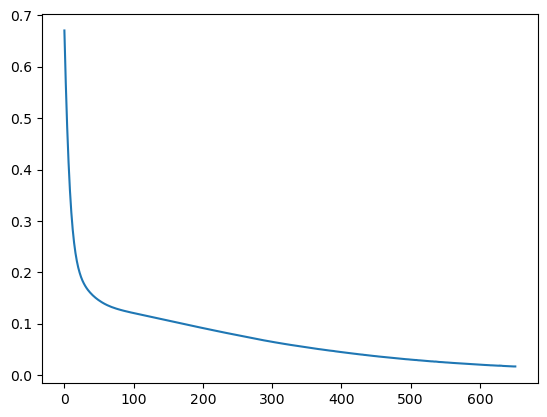

In [16]:
plt.plot(mlp.loss_curve_)

In [17]:
y_mlp_pred = mlp.predict(X_test_scaled)
y_mlp_pred
print(classification_report(y_test, y_mlp_pred, digits=3))

              precision    recall  f1-score   support

           0      0.667     0.471     0.552        17
           1      0.980     0.991     0.986       451

    accuracy                          0.972       468
   macro avg      0.823     0.731     0.769       468
weighted avg      0.969     0.972     0.970       468



### Предсказание

In [18]:
 # Выполним предсказание для первого объекта
X_test.head()

,num_frames,num_frames_avg,num_packets,num_packets_avg,num_packets_out_avg,num_packets_out_max,num_packets_out_min,num_packets_in_avg,num_packets_in_max,num_packets_in_min,...,num_forwarded_packets,num_forwarded_packets_avg,num_forwarded_packets_max,num_forwarded_packets_min,num_packets_created_avg,num_packets_created_max,num_packets_created_min,frac_packets_created_acquired_avg,frac_packets_created_acquired_max,frac_packets_created_acquired_min
438,30729,2048,24471,1631,201,1594,48,197,1677,29,...,7727,515,1218,137,4,82,48,1.0,1,1
1636,35273,2351,28247,1883,252,2872,41,238,2907,32,...,9972,665,2491,102,2,1752,41,1.0,1,1
2148,32627,2175,26125,1741,211,1710,46,211,1771,37,...,8615,574,1330,110,1,83,46,1.0,1,1
2308,32769,2184,26241,1749,211,1688,40,211,1742,36,...,8600,573,1311,112,1,80,40,1.0,1,1
1171,63852,2902,51120,2323,263,2657,43,264,2710,30,...,19525,888,2282,122,1,86,43,1.0,1,1


In [19]:
# Выбираем произвольный объект из начального набора данных
test_obj = X_test.loc[[1974]]

# Не забываем масштабировать признаки тестового объекта 
test_obj = sc.transform(test_obj)
print("Assigned class: ",mlp.predict(test_obj))

Assigned class:  [1]


In [20]:
test_1 = pd.read_csv('/Users/ekaterina/github_repos/ITMO_STUDY/ datasets/ DL_datasets/DL_Task_2_test_file_28.csv', delimiter= ',')

# Не забываем масштабировать признаки тестового объекта 
test_1 = sc.transform(test_1)
print("Assigned class: ",mlp.predict(test_1))

Assigned class:  [0]


In [21]:
test_2 = pd.read_csv('/Users/ekaterina/github_repos/ITMO_STUDY/ datasets/ DL_datasets/DL_Task_2_test_file_2_59.csv', delimiter= ',')

# Не забываем масштабировать признаки тестового объекта 
test_2 = sc.transform(test_2)
print("Assigned class: ",mlp.predict(test_2))

Assigned class:  [1]


In [22]:
test_3 = pd.read_csv('/Users/ekaterina/github_repos/ITMO_STUDY/ datasets/ DL_datasets/DL_Task_2_test_file_3_99.csv', delimiter= ',')

# Не забываем масштабировать признаки тестового объекта 
test_3 = sc.transform(test_3)
print("Assigned class: ",mlp.predict(test_3))

Assigned class:  [1]


In [23]:
test_4 = pd.read_csv('/Users/ekaterina/github_repos/ITMO_STUDY/ datasets/ DL_datasets/DL_Task_2_test_file_4_166.csv', delimiter= ',')

# Не забываем масштабировать признаки тестового объекта 
test_4 = sc.transform(test_4)
print("Assigned class: ",mlp.predict(test_4))

Assigned class:  [1]
